## Build a CNN model using tensorflow sequential API to classify CIFAR-10  dataset
***
#### **Name:** Foysal Ahamed Nirob
#### **Id:** 19-40925-2
#### **Section:** CVPR [C]

 # **Introduction:**

This assignment explores the classification of images using the CIFAR-10 dataset. The dataset consists of 60,000 32x32x3 color images in 10 categories. Catagories are: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. 

In this project, we aim to build a Convolutional Neural Network (CNN) to classify the CIFAR-10 dataset. We will explore techniques such as grayscale conversion, different optimizers, and regularization to achieve accurate classification without overfitting. The goal is to find the best model for this benchmark dataset and gain insights into CNN performance for image classification tasks.

## **Dataset and Preprocessing:**

We will be working with the CIFAR-10 dataset, which is widely used for image classification tasks. The CIFAR-10 dataset consists of 60,000 32x32x3 color images in ten different categories or classes.

To begin, you can download the CIFAR-10 dataset from the following link: __[CIFAR-10 Dataset](https://github.com/YoongiKim/CIFAR-10-images)__

Or we can import it using: **from tensorflow.keras.datasets import cifar10**


## **Step-1:** Importing necessary libraries:

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


## **Step-2:** Load and gray-scale the CIFAR-10 dataset:

**Define the path to the dataset directory**


In [7]:
DATA_DIR = '/kaggle/input/cifardata/CIFAR-10-images-master-original'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')



**Load the CIFAR-10 dataset using the custom function with grayscale images**

In [8]:

def load_cifar10_dataset(train_data_dir, test_data_dir):
    train_images, train_labels = [], []
    test_images, test_labels = [], []

    for category_id, category in enumerate(os.listdir(train_data_dir)):
        if category != '.DS_Store':  # Exclude '.DS_Store' from the list
            category_path = os.path.join(train_data_dir, category)
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                img = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32), color_mode='grayscale')
                img = tf.keras.preprocessing.image.img_to_array(img)
                train_images.append(img)
                train_labels.append(category_id)

    for category_id, category in enumerate(os.listdir(test_data_dir)):
        if category != '.DS_Store':  # Exclude '.DS_Store' from the list
            category_path = os.path.join(test_data_dir, category)
            for image_name in os.listdir(category_path):
                image_path = os.path.join(category_path, image_name)
                img = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32), color_mode='grayscale')
                img = tf.keras.preprocessing.image.img_to_array(img)
                test_images.append(img)
                test_labels.append(category_id)

    # Convert lists to TensorFlow tensors
    train_images = tf.convert_to_tensor(train_images, dtype=tf.float32)
    test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)

    # Normalize the pixel values to [0, 1]
    train_images /= 255.0
    test_images /= 255.0

    # One-hot encode the labels
    num_classes = len(os.listdir(train_data_dir))
    train_labels = to_categorical(train_labels, num_classes)
    test_labels = to_categorical(test_labels, num_classes)

    return (train_images, train_labels), (test_images, test_labels)


**Load the CIFAR-10 dataset using the custom function with grayscale images**

In [9]:
(train_images, train_labels), (test_images, test_labels) = load_cifar10_dataset(TRAIN_DATA_DIR, TEST_DATA_DIR)

## **Step-3:** Build CNN model:

The model consists of three Convolutional layers with MaxPooling, followed by two Dense layers. It uses ReLU activation for hidden layers and softmax activation for the output layer. The model.summary() displays the model architecture and parameters.

In [10]:
def create_cnn_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = create_cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

**For previous layer we are having overfitting in ADAM and RMSPROP optimizer. So we are building new model with dropout layer. **

In [11]:
def create_cnn_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = create_cnn_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

## **Step-4:** Compile and train the model with different optimizers.

In [12]:

def train_model(model, optimizer='adam', momentum=None):
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    if optimizer == 'sgd' and momentum is not None:
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=momentum)

    history = model.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=32,
        validation_data=(test_images, test_labels),
        verbose=1
    )

    return history



## **Step-4:** Train the Model with Different Optimizers like agd, adam, rmsprop:

In [13]:
optimizers = ['sgd', 'adam', 'rmsprop']
momentum_values = [0.0, 0.5, 0.9]
histories = {}

for opt in optimizers:
    print(f"Training with optimizer: {opt}")
    if opt == 'sgd':
        for momentum_val in momentum_values:
            print(f"Training with momentum: {momentum_val}")
            model = create_cnn_model()
            history = train_model(model, optimizer=opt, momentum=momentum_val)
            histories[(opt, momentum_val)] = history
    else:
        model = create_cnn_model()
        history = train_model(model, optimizer=opt)
        histories[(opt, None)] = history

Training with optimizer: sgd
Training with momentum: 0.0
Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 2.1915 - accuracy: 0.1891 - val_loss: 2.0963 - val_accuracy: 0.2742
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.9201 - accuracy: 0.3150 - val_loss: 1.8640 - val_accuracy: 0.3492
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.7173 - accuracy: 0.3855 - val_loss: 1.7841 - val_accuracy: 0.3612
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6130 - accuracy: 0.4257 - val_loss: 1.6649 - val_accuracy: 0.4227
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5411 - accuracy: 0.4536 - val_loss: 1.6335 - val_accuracy: 0.4238
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4797 - accuracy: 0.4751 - val_loss: 1.5641 - val_accuracy: 0.4533
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/st

## **Step-6:** Implement Model Regularization with L1 and L2 Regularizers:

In [14]:
from tensorflow.keras import regularizers

def create_cnn_model_with_regularization(regularizer=None):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), kernel_regularizer=regularizer))
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


model_with_L1_regularizer = create_cnn_model_with_regularization(regularizer=regularizers.l1(0.01))
model_with_L2_regularizer = create_cnn_model_with_regularization(regularizer=regularizers.l2(0.01))


## **Step-7:** Train Models with Regularization:

In [15]:
def train_model_with_regularization(model, optimizer='adam'):
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )

    history = model.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=64,
        validation_data=(test_images, test_labels),
        verbose=1
    )

    return history


history_L1 = train_model_with_regularization(model_with_L1_regularizer, optimizer='adam')
history_L2 = train_model_with_regularization(model_with_L2_regularizer, optimizer='adam')


Epoch 1/10
782/782 [==============================] - 59s 74ms/step - loss: 3.3111 - accuracy: 0.1007 - val_loss: 2.4151 - val_accuracy: 0.1000
Epoch 2/10
782/782 [==============================] - 58s 74ms/step - loss: 2.4151 - accuracy: 0.0990 - val_loss: 2.4144 - val_accuracy: 0.1000
Epoch 3/10
782/782 [==============================] - 58s 74ms/step - loss: 2.4151 - accuracy: 0.0976 - val_loss: 2.4150 - val_accuracy: 0.1000
Epoch 4/10
782/782 [==============================] - 57s 73ms/step - loss: 2.4151 - accuracy: 0.0967 - val_loss: 2.4145 - val_accuracy: 0.1000
Epoch 5/10
782/782 [==============================] - 58s 75ms/step - loss: 2.4151 - accuracy: 0.0981 - val_loss: 2.4159 - val_accuracy: 0.1000
Epoch 6/10
782/782 [==============================] - 59s 75ms/step - loss: 2.4151 - accuracy: 0.0969 - val_loss: 2.4146 - val_accuracy: 0.1000
Epoch 7/10
782/782 [==============================] - 58s 74ms/step - loss: 2.4151 - accuracy: 0.0980 - val_loss: 2.4152 - val_accuracy:

## **Step-8:** Train Model Without Preprocessing:

In [16]:
model_no_preprocessing = create_cnn_model()
model_no_preprocessing.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_no_preprocessing = model_no_preprocessing.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=1
)


Epoch 1/10
782/782 [==============================] - 60s 75ms/step - loss: 1.6510 - accuracy: 0.4058 - val_loss: 1.4791 - val_accuracy: 0.4887
Epoch 2/10
782/782 [==============================] - 58s 75ms/step - loss: 1.2880 - accuracy: 0.5473 - val_loss: 1.2561 - val_accuracy: 0.5672
Epoch 3/10
782/782 [==============================] - 58s 74ms/step - loss: 1.1324 - accuracy: 0.6037 - val_loss: 1.1891 - val_accuracy: 0.5880
Epoch 4/10
782/782 [==============================] - 58s 75ms/step - loss: 1.0420 - accuracy: 0.6366 - val_loss: 1.2206 - val_accuracy: 0.5741
Epoch 5/10
782/782 [==============================] - 59s 75ms/step - loss: 0.9661 - accuracy: 0.6638 - val_loss: 1.0419 - val_accuracy: 0.6382
Epoch 6/10
782/782 [==============================] - 58s 75ms/step - loss: 0.9078 - accuracy: 0.6843 - val_loss: 1.0212 - val_accuracy: 0.6427
Epoch 7/10
782/782 [==============================] - 58s 74ms/step - loss: 0.8673 - accuracy: 0.6982 - val_loss: 0.9319 - val_accuracy:

## **Step-9:** ploting the findings:

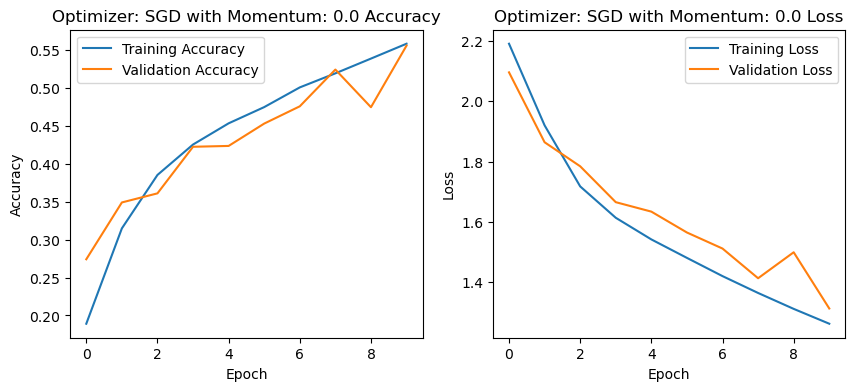

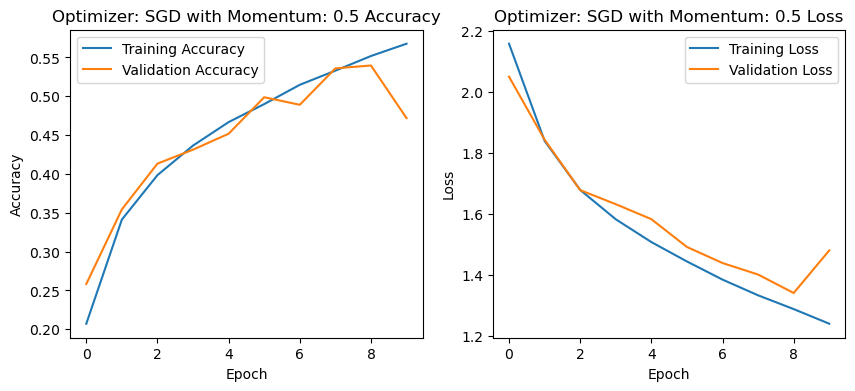

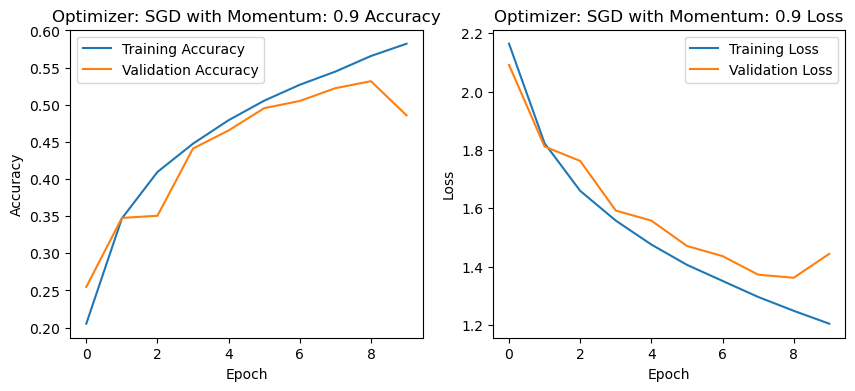

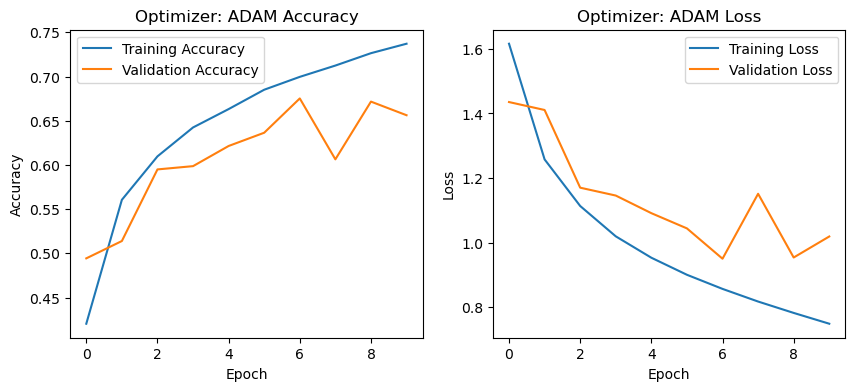

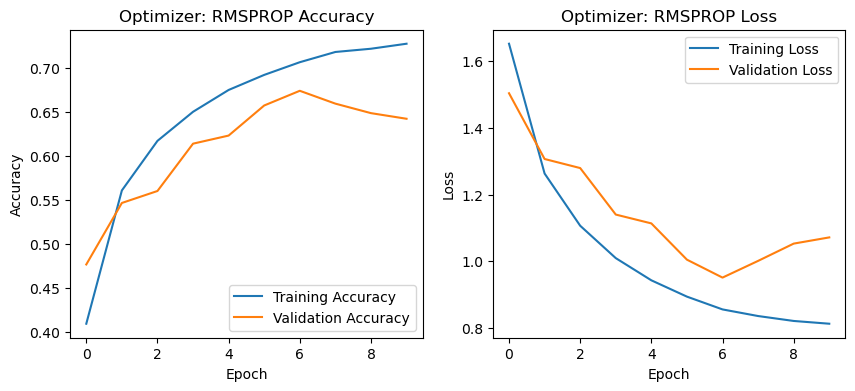

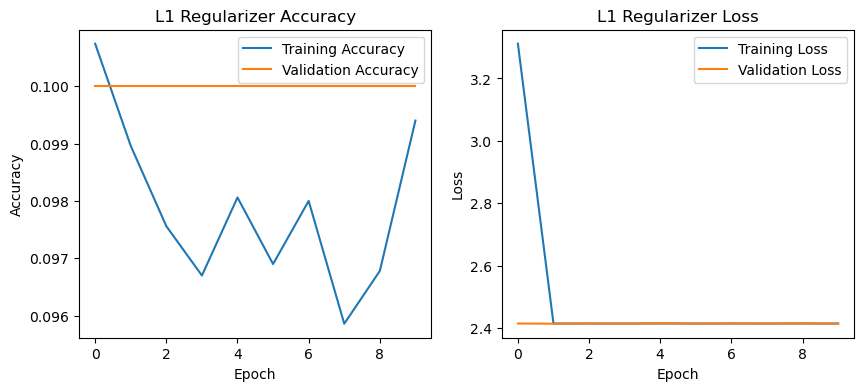

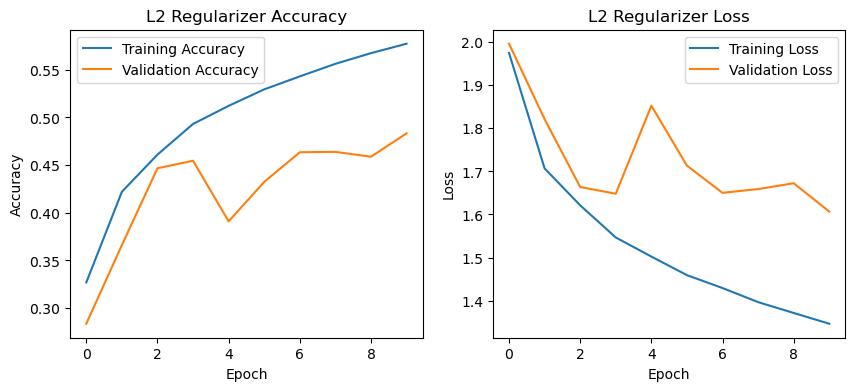

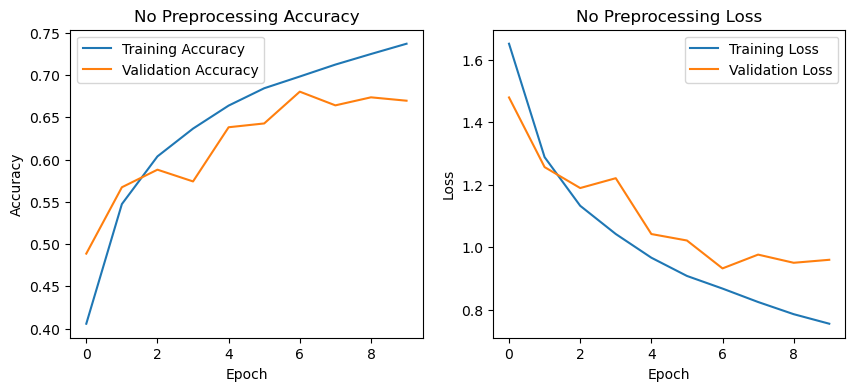

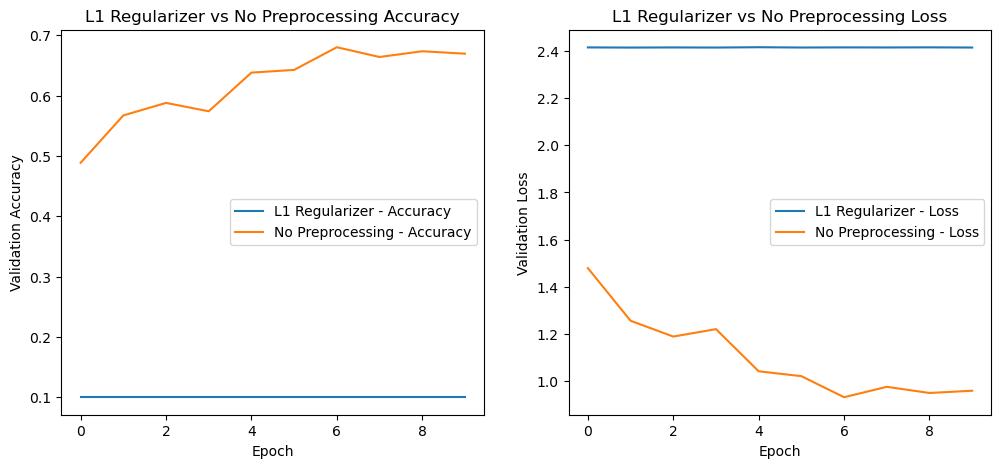

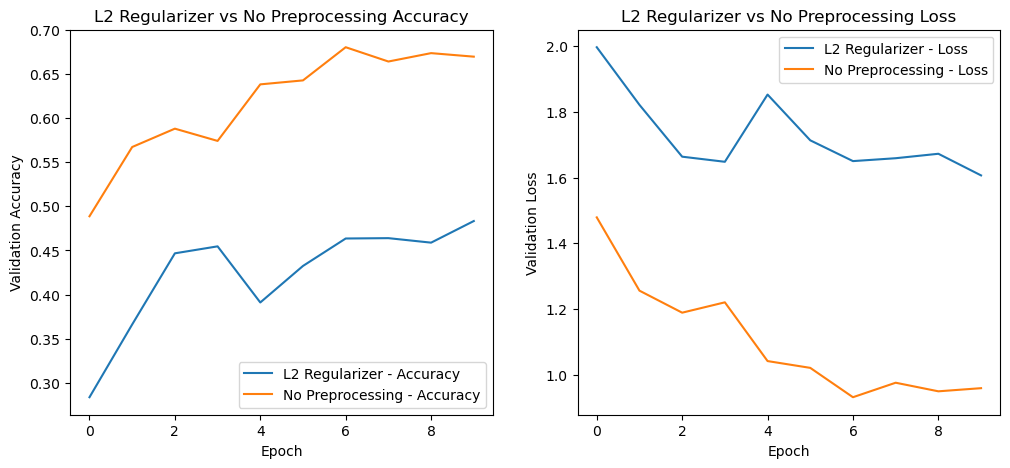

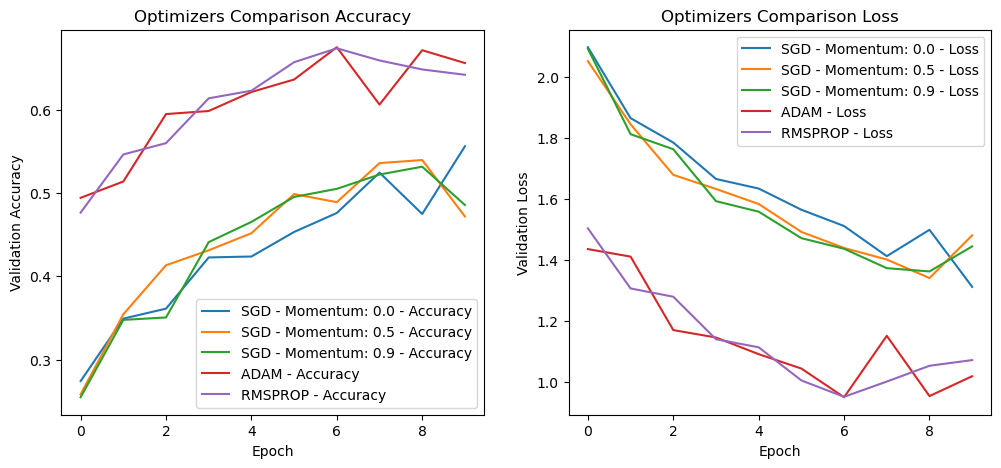

In [28]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title + ' Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + ' Loss')

    plt.show()

# Plot histories for different optimizers
for opt, momentum_val in histories:
    title = f'Optimizer: {opt.upper()}'
    if momentum_val is not None:
        title += f' with Momentum: {momentum_val}'
    plot_history(histories[(opt, momentum_val)], title)

# Plot history for L1 Regularizer
plot_history(history_L1, 'L1 Regularizer')

# Plot history for L2 Regularizer
plot_history(history_L2, 'L2 Regularizer')

# Plot history for No Preprocessing
plot_history(history_no_preprocessing, 'No Preprocessing')

# Comparison for different optimizers
def plot_optimizer_comparison(histories, optimizer_names, title):
    plt.figure(figsize=(12, 5))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    for history, optimizer_name in zip(histories, optimizer_names):
        plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title(title + ' Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    for history, optimizer_name in zip(histories, optimizer_names):
        plt.plot(history.history['val_loss'], label=f'{optimizer_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.title(title + ' Loss')

    plt.show()

# Comparison for L1 Regularizer vs No Preprocessing
plot_optimizer_comparison([history_L1, history_no_preprocessing], ['L1 Regularizer', 'No Preprocessing'], 'L1 Regularizer vs No Preprocessing')

# Comparison for L2 Regularizer vs No Preprocessing
plot_optimizer_comparison([history_L2, history_no_preprocessing], ['L2 Regularizer', 'No Preprocessing'], 'L2 Regularizer vs No Preprocessing')

# Comparison for different optimizers
def plot_optimizer_comparison(histories, optimizer_names, momentum_values, title):
    plt.figure(figsize=(12, 5))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    for opt in optimizer_names:
        if opt == 'sgd':
            for momentum_val in momentum_values:
                plt.plot(histories[(opt, momentum_val)].history['val_accuracy'], label=f'{opt.upper()} - Momentum: {momentum_val} - Accuracy')
        else:
            plt.plot(histories[(opt, None)].history['val_accuracy'], label=f'{opt.upper()} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title(title + ' Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    for opt in optimizer_names:
        if opt == 'sgd':
            for momentum_val in momentum_values:
                plt.plot(histories[(opt, momentum_val)].history['val_loss'], label=f'{opt.upper()} - Momentum: {momentum_val} - Loss')
        else:
            plt.plot(histories[(opt, None)].history['val_loss'], label=f'{opt.upper()} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.title(title + ' Loss')

    plt.show()

# Create a list of optimizer names
optimizer_names = ['sgd', 'adam', 'rmsprop']
momentum_values = [0.0, 0.5, 0.9]

# Comparison for different optimizers
plot_optimizer_comparison(histories, optimizer_names, momentum_values, 'Optimizers Comparison')



## **Discription:**

In this assignment, we are working on building a Convolutional Neural Network (CNN) to classify the CIFAR-10 dataset. The objective is to achieve maximum accuracy with minimum loss while avoiding overfitting. We explored various optimization techniques, regularization methods (L1 and L2), and the impact of data preprocessing on model performance.

Our optimization are Stochastic Gradient Descent (SGD), Adaptive Moment Estimation (Adam), and Root Mean Square Propagation (RMSprop). 

> **1. Stochastic Gradient Descent (SGD):**

It updates the model parameters using the gradients of the loss function with respect to each parameter. The learning rate in SGD plays a crucial role in determining the step size for parameter updates. From our result we can see SDG are giving use less overfitting for every momentum (0.0, 0.5, 0.9). 

Momentum is an additional hyperparameter in SGD that influences the optimization process. It helpes the optimizer to accelerate the convergence in the relevant direction and dampens oscillations [[1]](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d). We used different momentum values (0.0, 0.5, and 0.9) to see how momentum affects the overall performance of the model. From the graph we can see,

    For momentum values 0.0, accuracy = 55%, data loss = 1.3 and No overfitting observed
    
    For momentum values 0.5, accuracy = 58%, data loss = 1.2 and Less overfitting observed
    
    For momentum values 0.9, accuracy = 61%, data loss = 1.2 and Overfitting observed
    
> **Adaptive Moment Estimation (Adam):**

Adam is an adaptive optimization algorithm that maintains separate learning rates for each parameter. It benefits of both AdaGrad and RMSprop, which provide faster convergence and better generalization.[[2]](https://www.geeksforgeeks.org/adam-adaptive-moment-estimation-optimization-ml/)

> **Root Mean Square Propagation (RMSprop):**

It helps in mitigating the vanishing and exploding gradient problems, which can occur in deep neural networks. By using a moving average of squared gradients, RMSprop adapts the learning rate for each parameter, providing faster convergence and stability. [[3]](https://www.andreaperlato.com/aipost/root-mean-square-propagation/)


> **Accuracy and data loss for SGD vs Adam Vs RMSprop:**

    For SGD,  accuracy = 57%, data loss = 1.2 and No overfitting observed
    
    For Adam, accuracy = 74%, data loss = 1.0 and Little overfitting observed
    
    For RMSprop accuracy=75%, data loss = 1.1 and Some overfitting observed
    


Overall, this assignment help use to understand different optimization techniques and regularization methods, and it help us to understand the importance of data preprocessing in training CNN models. 
